<a href="https://colab.research.google.com/github/maung-htay/MachineLearningAI/blob/main/MachineLearningA_Z(DataProcessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Prepocessing Tools

# Basic

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [ ]:
print(X, y)

if dataset.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]] ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']
There are missing values in the DataFrame.


## Taking Care of missing data


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding caegorical data

In [ ]:
# columns transform
# one hot encoder class
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Trainning set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train)

[[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 50.0 83000.0]
 [0.0 0.0 1.0 27.0 48000.0]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])


In [ ]:
print(X_train)

[[1.0 0.0 0.0 -0.7529426005471072 -0.6260377781240918]
 [1.0 0.0 0.0 1.008453807952985 1.0130429500553495]
 [1.0 0.0 0.0 1.7912966561752484 1.8325833141450703]
 [0.0 1.0 0.0 -1.7314961608249362 -1.0943465576039322]
 [1.0 0.0 0.0 -0.3615211764359756 0.42765697570554906]
 [0.0 1.0 0.0 0.22561095973072184 0.05040823668012247]
 [0.0 0.0 1.0 -0.16581046438040975 -0.27480619351421154]
 [0.0 0.0 1.0 -0.013591021670525094 -1.3285009473438525]]


# Simple Linear Regression

- y = mx + b

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importimg the dataset

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

In [ ]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


Splitting thd dataset into the Trainng set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Trainning the Simple Linear Regression model on the Trainning set

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [ ]:
y_pred = regression.predict(X_test)

In [ ]:
y_pred

array([115814.30756236,  71511.92534771, 102617.85328566,  75282.34085534,
        55487.65944028,  60200.67882482, 122412.53470072, 107330.8726702 ,
        63028.49045554,  35692.97802523])

Visualising the Trainning set results

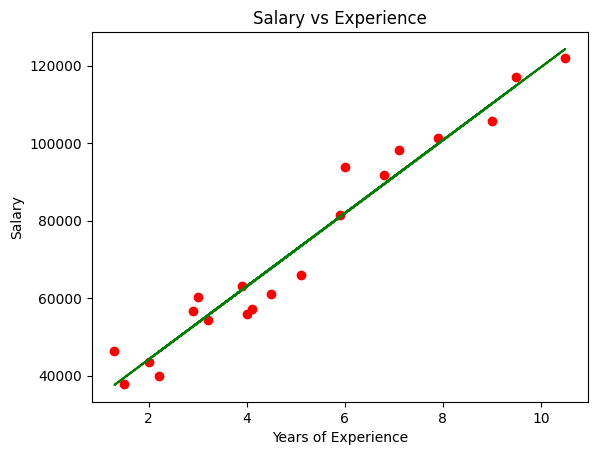

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regression.predict(X_train), color="green")
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualising the Test set results

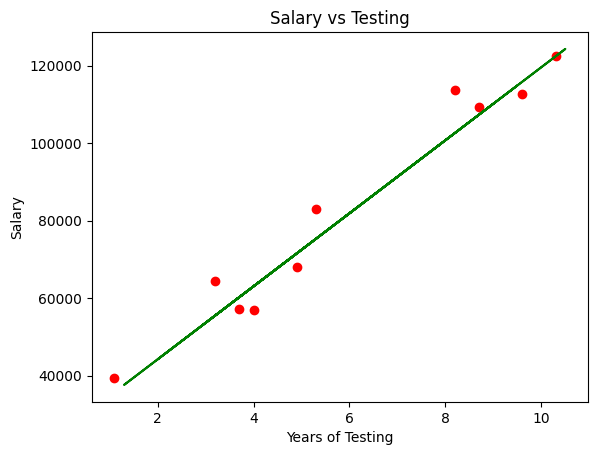

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regression.predict(X_train), color="green")
plt.title('Salary vs Testing')
plt.xlabel('Years of Testing')
plt.ylabel('Salary')
plt.show()

Making a single prediction

In [ ]:
print(regression.predict([[12]]))

[138436.80060814]


Getting the final linerar regression equation with the values of coefficients

In [ ]:
print(regression.coef_)
print(regression.intercept_)

[9426.03876907]
25324.33537924433


Therefore, the equation of our simple linear regression model is:

Salary=9345.94×YearsExperience+26816.19

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming y_test are the true target values and y_pred are the predicted target values
y_pred = regression.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or mse**(0.5)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 4956.5232614449005
Mean Squared Error: 35301898.887134895
Root Mean Squared Error: 5941.540110706558
R-squared: 0.9553063138044949


# Multiple Linear Regression

Note
 - No need to feature scalling for multiple linear regression
 - y = b0 + b1x1 + b2x2 + ... + bnxn

Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

Encoding categorical data

In [ ]:
# columns transform
# one hot encoder class
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

Splitting the dataset into the Trainning set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Trainning the multiple linerar regression model on the trainning set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

Making a single predication

In [ ]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[182943.06]


Getting the final linear regresssion equation with values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[-3.15e+02  6.24e+02 -3.08e+02  8.06e-01 -6.88e-02  2.99e-02]
54343.299849404015


Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

Accuracy checking

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming y_test are the true target values and y_pred are the predicted target values
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)  # or mse**(0.5)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Absolute Error: 6961.477813276096
Mean Squared Error: 82010363.0450707
Root Mean Squared Error: 9055.957323500961
R-squared: 0.8987266414319133


# Polynomial Regression

 - y = b0 + b1x + b2x^2 + ... + bnx^n

To predict previous salary , et
non linaear regression

Importing the library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Trainning the linear Regression model with the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

Trainning the Polynomial Regression model with the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
poly_X = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(poly_X, y)

LinearRegression()

Visualising the linear regression result

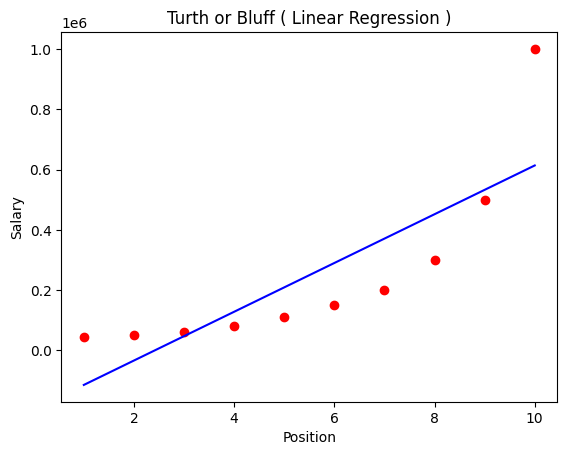

In [ ]:
plt.scatter(X, y , color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Turth or Bluff ( Linear Regression )')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Visualising the polynomial regression result

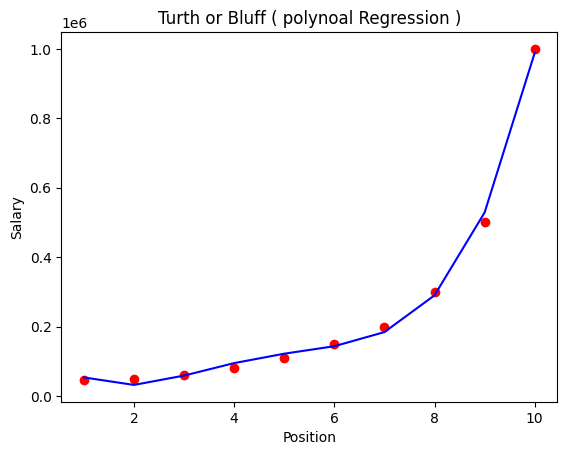

In [ ]:
plt.scatter(X, y , color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Turth or Bluff ( polynoal Regression )')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Visualising the polynomial regression result ( for highter resolution and smothly )

<ipython-input-18-1f5645cdafa1>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


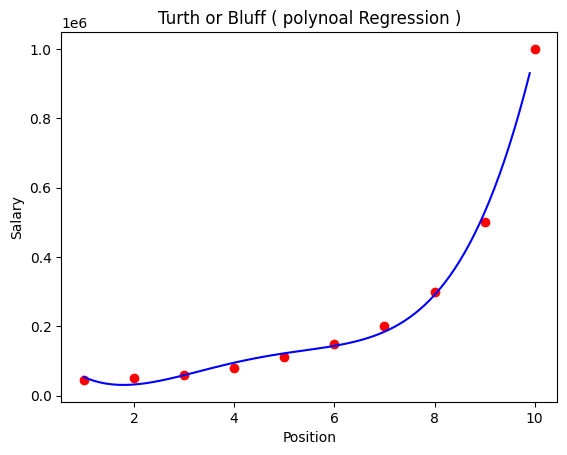

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y , color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Turth or Bluff ( polynoal Regression )')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

Predict of result wiht Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

array([330378.78787879])

Predict of result wiht Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# Support Vector Regression

 - Need to do feature scalling
 - f(x) = w^T \phi(x) + b

Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y = y.reshape(len(y), 1)

In [ ]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

Trainning the SVR model with the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predict the result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

Visualizing the SVR Model

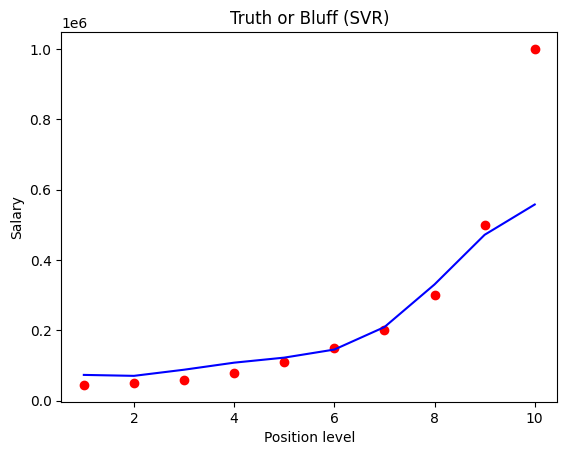

In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualizing the SVR Model ( For highest resolution and smoothly )

<ipython-input-33-7c0164da1aef>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


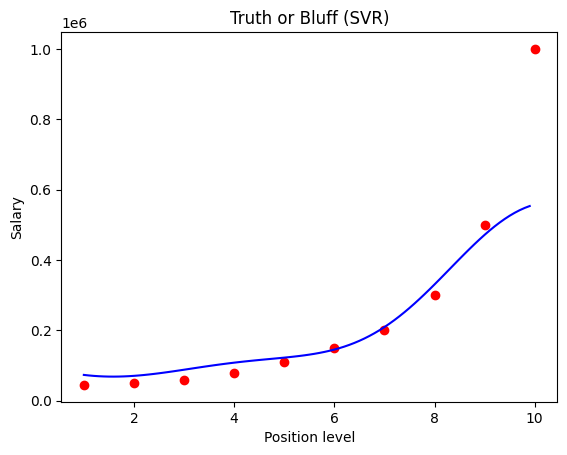

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Decision Tree Regression

 - No need feature scaling

Importing the library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Trainning model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Predicting new result

In [ ]:
regressor.predict([[6.5]])

array([150000.])

Visualising the Decision Tree

<ipython-input-7-9d91766349f6>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


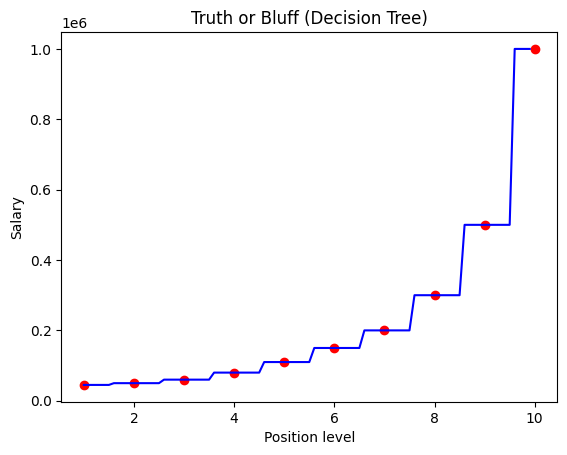

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Random Forest Regression

Importig the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Trainning the Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=11, random_state=0)
regressor.fit(X, y)


RandomForestRegressor(n_estimators=11, random_state=0)

Predicting a new result

In [ ]:
regressor.predict([[6.5]])

array([165454.54545455])

Visualiing the model

<ipython-input-15-1afd1789c95b>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


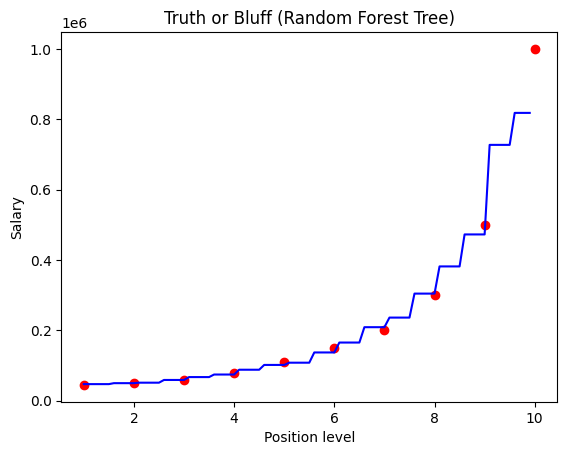

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Tree)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Real Practise for Regression

## Multi Linear Regression

In [ ]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# print(regressor.predict([[3.0, 40.0, 1000.0, 70.0], [31.0, 41.0, 1000.0, 70.0]]))

[[431.43 431.23]
 [458.56 460.01]
 [462.75 461.14]
 ...
 [469.52 473.26]
 [442.42 438.  ]
 [461.88 463.28]]


0.9325315554761303

## Polynomial Regression

In [ ]:
# Polynomial Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# print(regressor.predict(poly_reg.transform([[3.0, 40.0, 1000.0, 70.0], [31.0, 41.0, 1000.0, 70.0]])))

[[434.59 431.23]
 [458.28 460.01]
 [460.51 461.14]
 ...
 [469.81 473.26]
 [439.48 438.  ]
 [460.88 463.28]]
[493.54 429.09]


## SVR

In [ ]:
# Support Vector Regression (SVR)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

# Training the SVR model on the Training set
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[434.05 431.23]
 [457.94 460.01]
 [461.03 461.14]
 ...
 [470.6  473.26]
 [439.42 438.  ]
 [460.92 463.28]]


0.9480784049986258

## Decision Tree Regression

In [ ]:
# Decision Tree Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[431.28 431.23]
 [459.59 460.01]
 [460.06 461.14]
 ...
 [471.46 473.26]
 [437.76 438.  ]
 [462.74 463.28]]


0.922905874177941

## Random Forest Regression

In [ ]:
# Random Forest Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 11, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

[[433.95 431.23]
 [458.88 460.01]
 [462.65 461.14]
 ...
 [469.14 473.26]
 [439.4  438.  ]
 [460.33 463.28]]


0.9623812995682204

# Practise with medical data

Importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')

In [ ]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X[:5])

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]


In [ ]:
print(y[:5])

[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


Checking Null data exist or not

In [ ]:
if dataset.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


Encoding categorical data

In [ ]:
# columns transform
# one hot encoder class
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X[:5])

[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705 0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 32 28.88 0]]


In [ ]:
np.array(ct.fit_transform([[19, 'female', 27.9, 0, 'yes', 'southwest']]))

array([[1.0, 1.0, 1.0, 19, 27.9, 0]], dtype=object)

Split Features

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Multi Linear Regression

Trainng model using with the all dataset

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7835929767120722

## Random Forest Regression

In [ ]:

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 11, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

# regressor.predict([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 34, 29.1, 0]])

0.8610600664917105


In [ ]:
# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # scale the test data

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))  # scale the test data

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 11, random_state = 0)
regressor.fit(X_train_scaled, y_train_scaled.ravel())  # use ravel() to convert y_train_scaled to 1D array

# Predicting the Test set results
y_pred_scaled = regressor.predict(X_test_scaled)

# Reverse the scaling
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test = scaler_y.inverse_transform(y_test_scaled)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

# Predicting a single result
single_result_scaled = regressor.predict(scaler_X.transform(np.array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 34, 29.1, 0]])))
single_result = scaler_y.inverse_transform(single_result_scaled.reshape(-1, 1))
print(single_result)

0.8624283176325047
[[21134.]]


## SVR

In [ ]:
# Feature scaling
scaler = StandardScaler()
y_scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = y.reshape(len(y),1)
y_scaled = y_scaler.fit_transform(y)

# Data split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Train the SVR model
model = SVR(kernel="linear")
# model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

# y_scaler.inverse_transform(regressor.predict(scaler.transform([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 34, 29.1, 0]])).reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7422131980059026

## Polynomial Regression

In [ ]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

# Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8486225763472846

## Using Tensor

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the data
data_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
df = pd.read_csv(data_url)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# columns transform
# one hot encoder class
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])],
#                        remainder='passthrough')
# X = np.array(ct.fit_transform(X))


# Map 'smoker' to numerical values
df["smoker_no"] = df.smoker.map({'no':0, 'yes':1})
df["sex_no"] = df.sex.map({'female':0, 'male':1})

# Define features and target
X = df[['age', 'bmi', 'children','smoker_no','sex_no']].values
y = df['charges'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # transform the test data

# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train_poly)
X_test_scaled = scaler_X.transform(X_test_poly)  # scale the test data

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))  # scale the test data

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=200,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test_scaled),
                    verbose=2, callbacks=[early_stopping])

# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Reverse the scaling
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



In [ ]:
# Real one feature data
real_data = np.array([[31, 28.5, 0, 0, 1]])  # Example data

# Create polynomial features for the real data
real_data_poly = poly.transform(real_data)

# Scale the real data
real_data_scaled = scaler_X.transform(real_data_poly)

# Make a prediction with the model
real_pred_scaled = model.predict(real_data_scaled)

# Reverse the scaling of the prediction
real_pred = scaler_y.inverse_transform(real_pred_scaled)

print(f"The predicted charge for the real data is: {real_pred[0][0]}")

1/1 [==============================] - 0s 23ms/step
The predicted charge for the real data is: 4705.47509765625


# Regression Revision Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])],
#                        remainder='passthrough')
# X = np.array(ct.fit_transform(X))


In [ ]:
# Define the ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("encoder", LabelEncoder(), [1, 4]),  # Apply LabelEncoder to columns 1 and 4
    ],
    remainder="passthrough",  # Leave other columns unchanged
)

# Check for missing values
missing_values = np.sum(np.isnan(X))
if missing_values > 0:
    raise ValueError("Input data contains missing values. Please handle missing values before encoding.")

# Transform the data
try:
    data_transformed = np.array(ct.fit_transform(X))
except TypeError:
    raise ValueError("Error during data transformation. Please check your input data and column indices.")

# Print the transformed data
print(data_transformed)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(X[:5])

[[0.0 0.0 0.0 1.0 19 'female' 27.9 0 'yes']
 [0.0 0.0 1.0 0.0 18 'male' 33.77 1 'no']
 [0.0 0.0 1.0 0.0 28 'male' 33.0 3 'no']
 [0.0 1.0 0.0 0.0 33 'male' 22.705 0 'no']
 [0.0 1.0 0.0 0.0 32 'male' 28.88 0 'no']]


# Classfication

## Logistic Regression

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the dataset into the Trainning set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train[:5])

[[ 1.8925893   1.52189404]
 [ 0.1250379   0.03213212]
 [ 0.9106163  -1.31157471]
 [-1.34792161 -1.48684082]
 [-0.169554   -0.58129926]]


In [ ]:
print(X_test[:5])

[[ 0.812419   -1.39920777]
 [ 2.0889839   0.52871943]
 [-0.95513241 -0.75656537]
 [ 1.0088136   0.76240757]
 [-0.85693511 -1.22394166]]


### Trainning logistic regression on trainning set

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Predict the result

In [ ]:
print(classifier.predict(sc.transform([[32, 155000]])))

[1]


### Predicting the test result

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


### Model Score

In [ ]:
# Evaluating the Model Performance for regression or continue
from sklearn.metrics import r2_score, accuracy_score
r2_score(y_test, y_pred)

# for classfication or binary data
accuracy_score(y_test, y_pred)

0.86

### Making Confusion Matric

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  2]
 [12 25]]


### Visualization

<ipython-input-64-73b57679e135>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


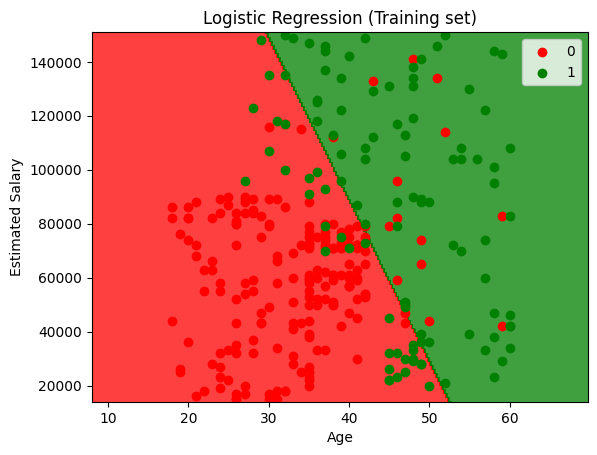

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-65-4a24fc64ffb4>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


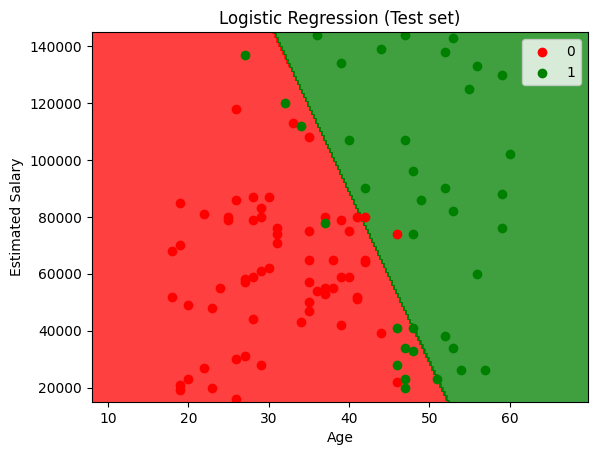

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### using Tensor flow


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the data
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=200,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    verbose=2, callbacks=[early_stopping])


# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary outputs

# Calculate accuracy
print(accuracy_score(y_test, y_pred))





Epoch 1/200
10/10 - 1s - loss: 0.1539 - mse: 0.1539 - val_loss: 0.0603 - val_mse: 0.0603 - 1s/epoch - 118ms/step
Epoch 2/200
10/10 - 0s - loss: 0.0998 - mse: 0.0998 - val_loss: 0.0601 - val_mse: 0.0601 - 58ms/epoch - 6ms/step
Epoch 3/200
10/10 - 0s - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0665 - val_mse: 0.0665 - 52ms/epoch - 5ms/step
Epoch 4/200
10/10 - 0s - loss: 0.0858 - mse: 0.0858 - val_loss: 0.0631 - val_mse: 0.0631 - 67ms/epoch - 7ms/step
Epoch 5/200
10/10 - 0s - loss: 0.0825 - mse: 0.0825 - val_loss: 0.0606 - val_mse: 0.0606 - 52ms/epoch - 5ms/step
Epoch 6/200
10/10 - 0s - loss: 0.0832 - mse: 0.0832 - val_loss: 0.0654 - val_mse: 0.0654 - 53ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 0.0792 - mse: 0.0792 - val_loss: 0.0591 - val_mse: 0.0591 - 70ms/epoch - 7ms/step
Epoch 8/200
10/10 - 0s - loss: 0.0787 - mse: 0.0787 - val_loss: 0.0562 - val_mse: 0.0562 - 65ms/epoch - 7ms/step
Epoch 9/200
10/10 - 0s - loss: 0.0783 - mse: 0.0783 - val_loss: 0.0620 - val_mse: 0.0620 - 54ms/

In [ ]:
# print(model.predict(sc.transform([[22, 55000]])))
print((model.predict(sc.transform([[32, 155000]])) > 0.5).astype(int))

1/1 [==============================] - 0s 41ms/step
[[1]]


In [ ]:
# Predicting the Test set results
# y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48  4]
 [ 2 26]]


## K Nerestest Neighbors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

# Evaluating the Model Performance for regression or continue
from sklearn.metrics import r2_score, accuracy_score
r2_score(y_test, y_pred)

# for classfication or binary data
print(accuracy_score(y_test, y_pred))

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))


0.93
[0]


## Support Vector Classfication

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train, y_train)

# Evaluating the Model Performance for regression or continue
from sklearn.metrics import r2_score, accuracy_score
r2_score(y_test, y_pred)

# for classfication or binary data
print(accuracy_score(y_test, y_pred))

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))


0.93
[0]


## Kernal SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf', random_state=0)
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[0]
[[57  6]
 [ 1 36]]


0.93

In [ ]:
# Kernel SVM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# Visualising the Training set results
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_train), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Kernel SVM (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

# # Visualising the Test set results
# from matplotlib.colors import ListedColormap
# X_set, y_set = sc.inverse_transform(X_test), y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Kernel SVM (Test set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

0.93

## Navie Bayes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[0]
[[61  2]
 [ 5 32]]


0.93

## Decision Tree Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', splitter="best")
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[0]
[[56  7]
 [10 27]]


0.83

## Random Forest Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting a new result
print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[0]
[[57  6]
 [ 5 32]]


0.89

# Clustering

## K Means Clustering

- No need to split data bsc no dependent variable

importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values



Using the ebolw method to find the optimal number of cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

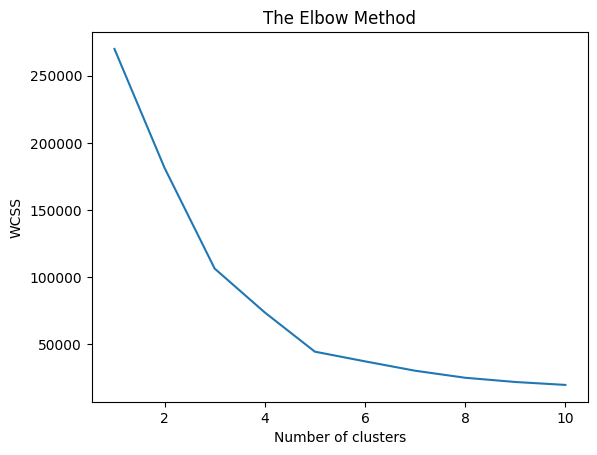

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Trainning KMeans model on the dataset

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


Visualising the clusters

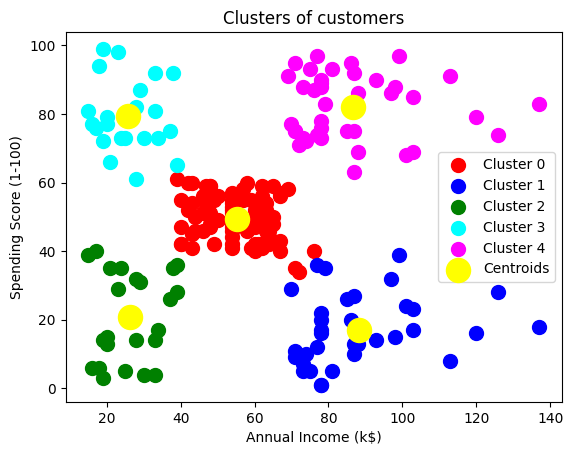

In [ ]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
dataset[:1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [ ]:
y_kmeans[30]

2

Check predict with real data

In [ ]:
kmeans.predict([[10,100]])

array([3], dtype=int32)

## Hierarcy Clustering -> Agglomerative

- Can not predict real data

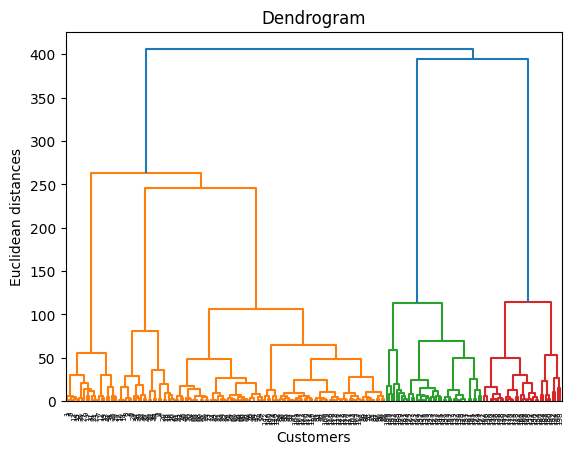

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


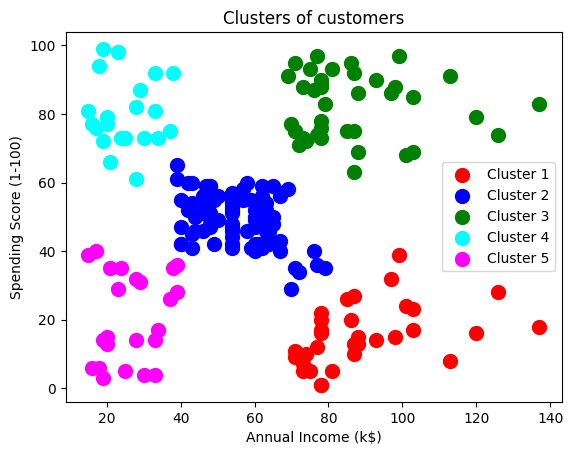

In [ ]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Association Rule Learning

- ဆက်စပ်တွေးတယ်, ဒီဟာ၀ယ်ပြီးရင် ဘယ်ဟာ၀ယ်နိုင်တယ် ဆိုတာ မျိုး

## Priori

Priori

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=0c0c0a4ea2dad3eef67e4709a5d3d2311ae20a0fc04e79acfa7f97d374b360a4
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
# Apriori

# Run the following command in the terminal to install the apyori package: pip install apyori

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
transactions = []
for i in range(0, 7501):
  transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])

# Training the Apriori model on the dataset
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

# Visualising the results

## Displaying the first results coming directly from the output of the apriori function
results = list(rules)
results

## Putting the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

## Displaying the results non sorted
resultsinDataFrame

## Displaying the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


# Reinforcement Learning

# Deep Learning

## Artificial Netural Network

- Same of model trainning of Regression Model and Classification Mode

## Convolution Netural Network

### Importing the libraray

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.15.0'

### Part 1 - Data Preprocessing

In [ ]:

# Load and preprocess the training set
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/training_set',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
)

# Rescale pixel values and apply data augmentation
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

train_set = train_set.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))

Found 104 files belonging to 2 classes.


In [ ]:

# Load and preprocess the test set
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test_set',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
)

# Rescale pixel values
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 34 files belonging to 2 classes.


### Part 2 - Building the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:


# Define the input shape
inputs = tf.keras.Input(shape=(64, 64, 3))

# Step 1 - Convolution
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(inputs)

# Step 2 - Pooling
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

# Adding a second convolutional layer
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2, strides=2)(x)

# Step 3 - Flattening
x = tf.keras.layers.Flatten()(x)

# Step 4 - Full Connection
x = tf.keras.layers.Dense(128, activation='relu')(x)

# Step 5 - Output Layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
model.fit(x=train_set, validation_data=test_set, epochs=25)

Epoch 1/25
4/4 [==============================] - 3s 221ms/step - loss: 0.7079 - accuracy: 0.5000 - val_loss: 0.7637 - val_accuracy: 0.3824
Epoch 2/25
4/4 [==============================] - 1s 245ms/step - loss: 0.7023 - accuracy: 0.5000 - val_loss: 0.7454 - val_accuracy: 0.3824
Epoch 3/25
4/4 [==============================] - 1s 237ms/step - loss: 0.6807 - accuracy: 0.5192 - val_loss: 0.6981 - val_accuracy: 0.4118
Epoch 4/25
4/4 [==============================] - 1s 133ms/step - loss: 0.6738 - accuracy: 0.5769 - val_loss: 0.6844 - val_accuracy: 0.6176
Epoch 5/25
4/4 [==============================] - 1s 138ms/step - loss: 0.6614 - accuracy: 0.6346 - val_loss: 0.8912 - val_accuracy: 0.3824
Epoch 6/25
4/4 [==============================] - 1s 149ms/step - loss: 0.7326 - accuracy: 0.4808 - val_loss: 0.7009 - val_accuracy: 0.5882
Epoch 7/25
4/4 [==============================] - 1s 145ms/step - loss: 0.6647 - accuracy: 0.5673 - val_loss: 0.6686 - val_accuracy: 0.5882
Epoch 8/25
4/4 [====

### predication

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
test_image = image.load_img('dataset/single_prediction/dog.4031.jpg', target_size=(64, 64))

# Convert the image to a numpy array
test_image = image.img_to_array(test_image)

# Add an extra dimension for the batch
test_image = np.expand_dims(test_image, axis=0)

# Normalize the image
test_image = test_image / 255.0

# Predict the class of the image
result = model.predict(test_image)

# Get the class indices from the training set
# class_names = train_set.class_names
# class_indices = train_set.class_indices

# Determine the predicted class
if result[0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 24ms/step
dog
